# Aufgabe 1 (2P)
Laden Sie den Datensatz „rawdata_luftqualitaet.csv“ in einen DataFrame. Skalieren Sie die Daten mit dem StandardScaler. Trennen Sie die
Daten in einen Lern- und Testdatensatz zur Classification des Labels "state_air_quality" mit den 3 Klassen 0, 1 und 2. Nutzen Sie alle 5
Merkmale 'humidity_inside','temperature_inside','co2_inside','temperature_heater‘ und 'temperature_wall_inside‘ im Training.

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('rawdata_luftqualitaet.csv')

X = df[df.columns[:-1]].values
y = df['state_air_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen. (1P)

<img src="images/1a.png" width="600">

In [86]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Multiple classification
model = Sequential()
model.add(Dense(units=60, input_shape=(5,), activation='relu', name='dense_9'))
model.add(Dense(units=60, activation='relu', name='dense_10'))
model.add(Dense(units=3, activation='softmax', name='dense_11_output'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11_output (Dense)         │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess mit „Overfitting“ ähnlich wie unten in der
Abbildung (1P)

<img src="images/1b.png" width="600">

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7336 - loss: 0.7883 - val_accuracy: 0.8207 - val_loss: 0.5548
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8456 - loss: 0.4695 - val_accuracy: 0.8370 - val_loss: 0.4024
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8798 - loss: 0.3635 - val_accuracy: 0.9130 - val_loss: 0.3271
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8989 - loss: 0.2994 - val_accuracy: 0.9185 - val_loss: 0.2744
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9057 - loss: 0.2491 - val_accuracy: 0.9185 - val_loss: 0.2348
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9126 - loss: 0.2108 - val_accuracy: 0.9348 - val_loss: 0.2017
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9317 - loss: 0.1817 - val_accuracy: 0.9457 - val_loss: 0.1796
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9399 - loss: 0.1596 - val_accuracy: 0.9511 - v

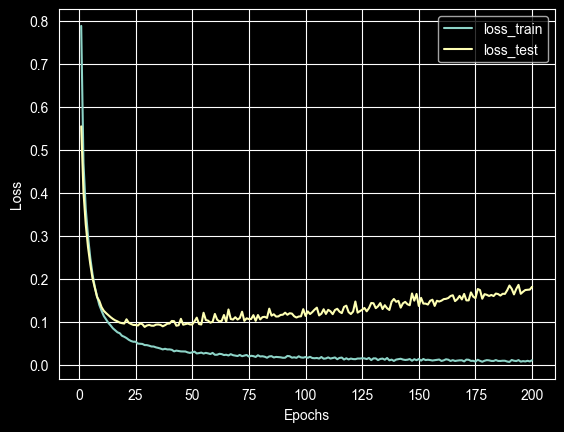

In [87]:
epochs = 200

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)

accuracy_train = history.history['accuracy']
loss_train = history.history['loss']
loss_test = history.history['val_loss']

epochs = range(1, len(accuracy_train)+1)

plt.plot(epochs, loss_train, label='loss_train')
plt.plot(epochs, loss_test, label='loss_test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

---
# Aufgabe 2 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Fügen Sie dieses Mal
Callbacks für ein EarlyStopping ein. (1P)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen sowie den definierten Callbacks und visualisieren Sie den Anlernprozess erneut,
ähnlich wie unten, je nach nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die
callbacks zu vermeiden. (1P)

<img src="images/2b.png" width="600">

---
# Aufgabe 3 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1 und 2.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Nutzen Sie dieses Mal
die Methode der L2-Regularisierung ohne Callbacks, um eine Überanpassung zu vermeiden. (1P)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess erneut, ähnlich wie unten, je nach
nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die Regularisierung zu vermeiden.
(1P)

<img src="images/3b.png" width="600">